# Using the epidemic intervention environment

After downloading the project files, go to the EpidemicInterventionEnv folder and run pip install --editable .
After this, the environment can be used as follows. 
File ./data/epidemic_2.csv has the proportion on Susceptible, Infected and Recovered during the course of the intervention

In [2]:
import gym
import json
import datetime as dt
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from BedEpidemicIntervention.envs.BedEpidemicInterventionEnv import BedEpidemicInterventionEnv
import pandas as pd

import gym
import copy
import torch
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
import math
import torchvision.transforms as T
import numpy as np
from DQN import DQN
import time


In [3]:
def plot_res(values, title=''):   
    ''' Plot the reward curve and histogram of results over time.'''
    # Update the window after each episode
    #clear_output(wait=True)
    
    # Define the figure
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    f.suptitle(title)
    ax[0].plot(values, label='score per run')
    ax[0].axhline(195, c='red',ls='--', label='goal')
    ax[0].set_xlabel('Episodes')
    ax[0].set_ylabel('Reward')
    x = range(len(values))
    ax[0].legend()
    # Calculate the trend
    try:
        z = np.polyfit(x, values, 1)
        p = np.poly1d(z)
        ax[0].plot(x,p(x),"--", label='trend')
    except:
        print('')
    
    # Plot the histogram of results
    ax[1].hist(values[-50:])
    ax[1].axvline(195, c='red', label='goal')
    ax[1].set_xlabel('Scores per Last 50 Episodes')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()
    plt.show()



def random_search(env, episodes, 
                  title='Random Strategy'):
    """ Random search strategy implementation."""
    final = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total = 0
        while not done:
            # Sample random actions
            action = env.action_space.sample()
            # Take action and extract results
            next_state, reward, done, _ = env.step(action)
            # Update reward
            total += reward
            if done:
                break
        # Add to the final reward
        final.append(total)
        plot_res(final,title)
    return final


In [4]:

def q_learning(env, model, episodes=1000, gamma=0.95, 
               epsilon=0.02, eps_decay=0.99,
               replay=False, replay_size=10000, 
               title = 'DQL', double=False, 
               n_update=10, soft=False, verbose=True):
    """Deep Q Learning algorithm using the DQN. """
    final = []
    memory = []
    episode_i=0
    sum_total_replay_time=0
    for episode in range(episodes):
        episode_i+=1
        if double and not soft:
            # Update target network every n_update steps
            if episode % n_update == 0:
                model.target_update()
        if double and soft:
            model.target_update()
        
        # Reset state
        state = env.reset()
        done = False
        total = 0
        
        while not done:
            # Implement greedy search policy to explore the state space
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                q_values = model.predict(state)
                action = torch.argmax(q_values).item()
            
            # Take action and add reward to total
            next_state, reward, done, _ = env.step(action)
            
            # Update total and memory
            total += reward
            memory.append((state, action, next_state, reward, done))
            if len(memory)>10000:
            	memory = memory[len(memory)-10000:len(memory)]
            q_values = model.predict(state).tolist()
             
            if done:
                if not replay:
                    q_values[action] = reward
                    # Update network weights
                    model.update(state, q_values)
                break

            if replay:
                t0=time.time()
                # Update network weights using replay memory
                model.replay(memory, replay_size, gamma)
                t1=time.time()
                sum_total_replay_time+=(t1-t0)
            else: 
                # Update network weights using the last step only
                q_values_next = model.predict(next_state)
                q_values[action] = reward + gamma * torch.max(q_values_next).item()
                model.update(state, q_values)

            state = next_state
        
        # Update epsilon
        epsilon = max(epsilon * eps_decay, 0.02)
        final.append(total)
        if episode ==episodes-1:
        	print("plotting reward")
        	plot_res(final, title)
        
        if verbose:
            print("episode: {}, total reward: {}".format(episode_i, total))
            if replay:
                print("Average replay time:", sum_total_replay_time/episode_i)
        
    return final

In [7]:
# The algorithms require a vectorized environment to run
env = gym.make('BedEpidemicIntervention:bed-epidemic-intervention-v0')
#random_search(env,10)


# Number of states
n_state = env.observation_space.shape[0]
# Number of actions
n_action = env.action_space.n
# Number of episodes
episodes = 2000
# Number of hidden nodes in the DQN
n_hidden = 64
# Learning rate
lr = 0.001


plotting reward


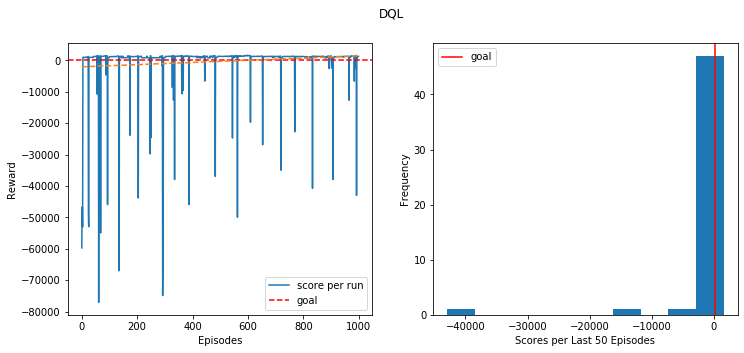

Reward =  1264.0


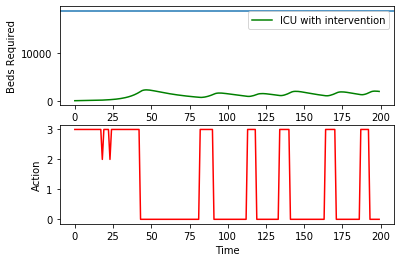

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
#-1000 reward 1000 eppisodes
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.95, epsilon=0.3,replay=False,verbose=False)
env.render()

plotting reward


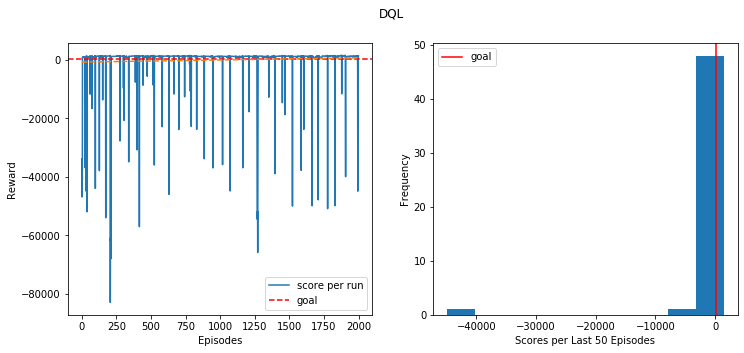

Reward =  1288.0


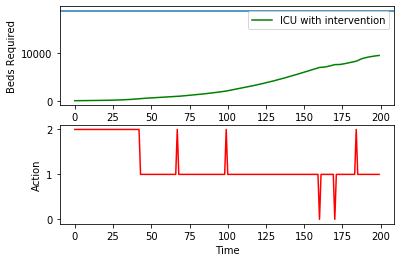

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [12]:
#-1000 reward 2000 eppisodes
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.95, epsilon=0.3,replay=False,verbose=False)
env.render()

In [ ]:
#-1000 reward 1000 eppisodes
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.95, epsilon=0.3,replay=False,verbose=False)
env.render()

In [ ]:
#-100


Reward =  1476.0


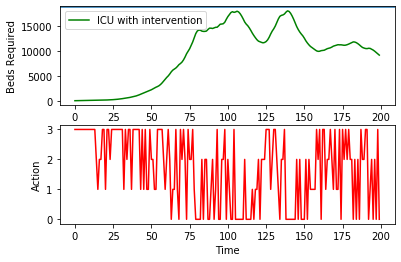

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 0,
 1,
 1,
 3,
 1,
 0,
 3,
 2,
 3,
 2,
 0,
 3,
 2,
 2,
 3,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 3,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 0,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 0,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 3,
 2,
 2,
 3,
 3,
 0,
 1,
 2,
 0,
 2,
 0,
 3,
 0]

In [14]:
#PPO2

model = PPO2(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=2000000)
obs = env.reset()
for i in range(200):
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
env.render()

plotting reward


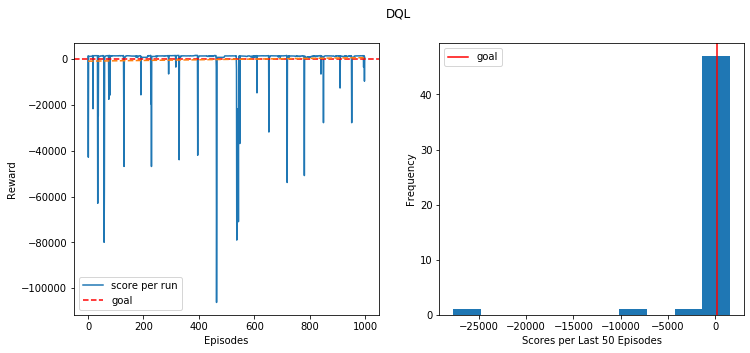

Reward =  810.0


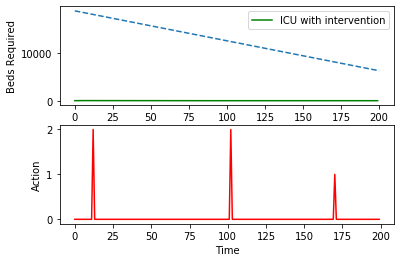

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
#decreasing beds and increase temperature
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.95, epsilon=0.3,replay=False,verbose=False)
env.render()

plotting reward


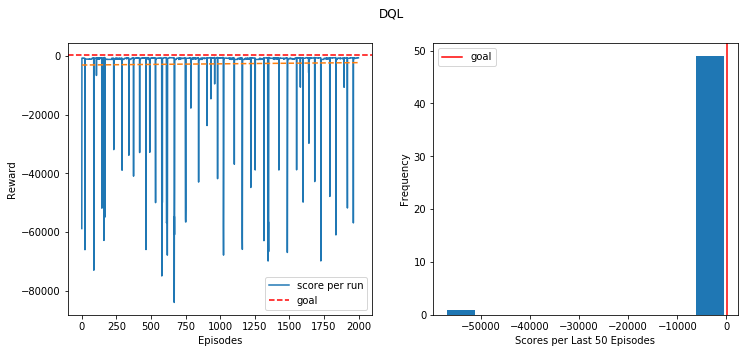

Reward =  1360.0


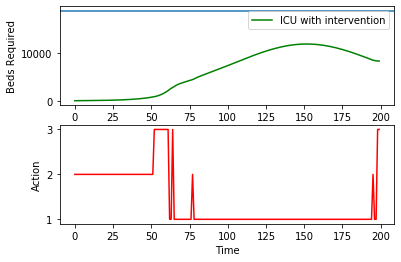

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 3]

In [8]:
#limit to gradual relaxation 2000 episodes
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.95, epsilon=0.3,replay=False,verbose=False)
env.render()

In [ ]:
#objective
#reduce cases too
#behavior- more  unhappy, lower compliance
#how actions map to changes-5% less effective than last time there was a lockdown

#size of outbreak
#rate at which people are infected
#delay impact 

In [ ]:
#assumptions- about how population and economy 

In [9]:

model = PPO2(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=200000)
obs = env.reset()
for i in range(200):
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
env.render()

W0827 16:29:54.902723 140735998317440 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:191: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0827 16:29:54.905431 140735998317440 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:200: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0827 16:29:54.911180 140735998317440 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/stable_baselines/common/policies.py:116: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0827 16:29:54.913157 140735998317440 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/stable_baselines/common/input.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 16:29:54.918308 140735998317440 deprecation.py:323] Fr

KeyboardInterrupt: 

In [11]:
#limit to gradual relaxation 2000 episodes
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.95, epsilon=0.3,replay=True,verbose=True)
env.render()

episode: 1, total reward: -1022.0
Average replay time: 0.00047087669372558594
episode: 2, total reward: -988.0
Average replay time: 0.0004572868347167969
episode: 3, total reward: -1068.0
Average replay time: 0.00046817461649576825
episode: 4, total reward: -996.0
Average replay time: 0.00046318769454956055
episode: 5, total reward: -1000.0
Average replay time: 0.0004925727844238281
episode: 6, total reward: -1058.0
Average replay time: 0.0005069176355997721
episode: 7, total reward: -1044.0
Average replay time: 0.0005166871207101005
episode: 8, total reward: -1018.0
Average replay time: 0.0005299150943756104
episode: 9, total reward: -1032.0
Average replay time: 0.0005202558305528429
episode: 10, total reward: -1032.0
Average replay time: 0.0005141258239746094
episode: 11, total reward: -1024.0
Average replay time: 0.0005103674801913174
episode: 12, total reward: -1034.0
Average replay time: 0.0005063215891520182
episode: 13, total reward: -1036.0
Average replay time: 0.00049996376037

episode: 110, total reward: -1128.0
Average replay time: 21.125697471878745
episode: 111, total reward: -1144.0
Average replay time: 21.217451276005924
episode: 112, total reward: -1148.0
Average replay time: 21.30097402206489
episode: 113, total reward: -1146.0
Average replay time: 21.392607739541383
episode: 114, total reward: -1114.0
Average replay time: 21.454343325213383
episode: 115, total reward: -1138.0
Average replay time: 21.54260251003763
episode: 116, total reward: -1160.0
Average replay time: 21.657090355610027
episode: 117, total reward: -1116.0
Average replay time: 21.819106525844997
episode: 118, total reward: -1136.0
Average replay time: 21.90361137309317
episode: 119, total reward: -1146.0
Average replay time: 21.99211323962492
episode: 120, total reward: -792.0
Average replay time: 22.06543279091517
episode: 121, total reward: -706.0
Average replay time: 22.301586732391485
episode: 122, total reward: -55984.0
Average replay time: 22.449710265534822
episode: 123, tota

episode: 220, total reward: -766.0
Average replay time: 28.09772054498846
episode: 221, total reward: -756.0
Average replay time: 28.09825966368973
episode: 222, total reward: -764.0
Average replay time: 28.097620241276854
episode: 223, total reward: -758.0
Average replay time: 28.096989007274132
episode: 224, total reward: -758.0
Average replay time: 28.103793191058294
episode: 225, total reward: -768.0
Average replay time: 28.1260894785987
episode: 226, total reward: -774.0
Average replay time: 28.146109360509215
episode: 227, total reward: -772.0
Average replay time: 28.163358209416728
episode: 228, total reward: -802.0
Average replay time: 28.16817649623804
episode: 229, total reward: -826.0
Average replay time: 28.177351021870777
episode: 230, total reward: -818.0
Average replay time: 28.176465328879978
episode: 231, total reward: -818.0
Average replay time: 28.177394666713038
episode: 232, total reward: -824.0
Average replay time: 28.18897258721549
episode: 233, total reward: -80

episode: 330, total reward: -1012.0
Average replay time: 29.563832348043267
episode: 331, total reward: -786.0
Average replay time: 29.632158682065427
episode: 332, total reward: -816.0
Average replay time: 29.698442385139234
episode: 333, total reward: -844.0
Average replay time: 30.03066133665251
episode: 334, total reward: -822.0
Average replay time: 30.0309610131258
episode: 335, total reward: -830.0
Average replay time: 30.024312933167415
episode: 336, total reward: -842.0
Average replay time: 30.01551180510294
episode: 337, total reward: -790.0
Average replay time: 30.00684505400389
episode: 338, total reward: -808.0
Average replay time: 30.00660251230883
episode: 339, total reward: -836.0
Average replay time: 30.00393512396686
episode: 340, total reward: -830.0
Average replay time: 29.995325102525598
episode: 341, total reward: -816.0
Average replay time: 29.986685646594093
episode: 342, total reward: -790.0
Average replay time: 29.978205860706797
episode: 343, total reward: -83

episode: 440, total reward: -746.0
Average replay time: 29.90610781691291
episode: 441, total reward: -750.0
Average replay time: 29.906658941385697
episode: 442, total reward: -720.0
Average replay time: 29.90641933382906
episode: 443, total reward: -698.0
Average replay time: 29.90566860687652
episode: 444, total reward: -650.0
Average replay time: 29.913337301026594
episode: 445, total reward: -626.0
Average replay time: 29.917958553185624
episode: 446, total reward: -584.0
Average replay time: 29.92171528574597
episode: 447, total reward: -526.0
Average replay time: 29.92134760850228
episode: 448, total reward: -526.0
Average replay time: 29.921683341264725
episode: 449, total reward: -51788.0
Average replay time: 29.922946908691678
episode: 450, total reward: -56988.0
Average replay time: 29.925976344214547
episode: 451, total reward: -850.0
Average replay time: 29.926662987986056
episode: 452, total reward: -850.0
Average replay time: 29.92656172535061
episode: 453, total reward:

episode: 550, total reward: -31724.0
Average replay time: 30.990727286338807
episode: 551, total reward: -1190.0
Average replay time: 30.98894795532019
episode: 552, total reward: -1194.0
Average replay time: 30.987366212882858
episode: 553, total reward: -1186.0
Average replay time: 30.986065613210307
episode: 554, total reward: -1174.0
Average replay time: 30.98456124364254
episode: 555, total reward: -1194.0
Average replay time: 31.017619745581
episode: 556, total reward: -1186.0
Average replay time: 31.028394453388323
episode: 557, total reward: -1192.0
Average replay time: 31.055086731268645
episode: 558, total reward: -1188.0
Average replay time: 31.072170178950046
episode: 559, total reward: -1172.0
Average replay time: 31.079484715657927
episode: 560, total reward: -948.0
Average replay time: 31.083685356378556
episode: 561, total reward: -848.0
Average replay time: 31.089785083304964
episode: 562, total reward: -776.0
Average replay time: 31.094140722658285
episode: 563, total

episode: 660, total reward: -768.0
Average replay time: 31.468413429910488
episode: 661, total reward: -736.0
Average replay time: 31.47052126356405
episode: 662, total reward: -726.0
Average replay time: 31.472070370195855
episode: 663, total reward: -658.0
Average replay time: 31.474190454857023
episode: 664, total reward: -664.0
Average replay time: 31.47611114059586
episode: 665, total reward: -730.0
Average replay time: 31.477956364208595
episode: 666, total reward: -770.0
Average replay time: 31.47965779390421
episode: 667, total reward: -780.0
Average replay time: 31.481963086878878
episode: 668, total reward: -804.0
Average replay time: 31.48488531498138
episode: 669, total reward: -736.0
Average replay time: 31.488130893764296
episode: 670, total reward: -732.0
Average replay time: 31.4934142998795
episode: 671, total reward: -734.0
Average replay time: 31.498900414934457
episode: 672, total reward: -704.0
Average replay time: 31.503691738560086
episode: 673, total reward: -66

episode: 770, total reward: -774.0
Average replay time: 31.89129283954571
episode: 771, total reward: -774.0
Average replay time: 31.905230217252104
episode: 772, total reward: -784.0
Average replay time: 31.905446165892744
episode: 773, total reward: -784.0
Average replay time: 31.924671840852785
episode: 774, total reward: -790.0
Average replay time: 31.94606646117622
episode: 775, total reward: -798.0
Average replay time: 31.95661390950603
episode: 776, total reward: -802.0
Average replay time: 31.96578621157666
episode: 777, total reward: -812.0
Average replay time: 31.97009235827619
episode: 778, total reward: -806.0
Average replay time: 31.969551380311923
episode: 779, total reward: -798.0
Average replay time: 31.96842103316634
episode: 780, total reward: -826.0
Average replay time: 31.967090698694573
episode: 781, total reward: -804.0
Average replay time: 31.965579511872022
episode: 782, total reward: -822.0
Average replay time: 31.963880283448397
episode: 783, total reward: -82

KeyboardInterrupt: 